![Medical Match company logo](MedicalMatch.svg)

### Problem Statement

**Business Context**:

RN turnover costs a hospital 56k per nurse. The avgerage annual cost of RN turnover is 4.8M per hospital. For every 20 travel RNs eliminated, the avg hospital can save $2M.

MedicalMatch is a medtech startup committed to revolutionizing healthcare staffing. As a data scientist on their product solutions team, I am tasked with analyzing hospital employee attrition data to quantify its financial impact on hospitals and clinics. This analysis will enable the marketing team to craft targeted campaigns promoting MedicalMatch’s innovative staffing solutions.


---


### Data Dictionary:

| Feature                     | Type     | Description                                              |
|-----------------------------|----------|----------------------------------------------------------|
| **age**                     | *int64*  | Age of employee. 1: >30, 2: 30-34, 3: 35-39, 4: 40-44, 5: 45-49, 6: 50-54, 7: 55-59, 8: 60-64, 9: 65+                                       |
| **attrition**               | *int64*  | Did the employee leave the hospital 0: No, 1: Yes       |
| **distancefromhome**        | *int64*  | Distance from home in minutes                            |
| **education**               | *int64*  | 1: High School/GED, 2: Trade/Associate, 3: Bachelor, 4: Master, 5: Doctorate |
| **environmentalsatisfaction** | *int64* | 1: Low, 2: Medium, 3: High, 4: Very High                |
| **gender**                  | *object*  | Female, Male                                     |
| **hourlyrate**              | *float64*| Hourly pay per US BLS May 2024                          |
| **jobinvolvement**          | *int64*  | 1: Low, 2: Medium, 3: High, 4: Very High                |
| **jobrole**                 | *object* | Current job title                                       |
| **jobsatisfaction**         | *int64*  | 1: Low, 2: Medium, 3: High, 4: Very High                |
| **maritalstatus**           | *object* | Single, Married, Divorced                               |
| **monthlyincome**           | *float64*| Monthly pay per US BLS May 2024                         |
| **numcompaniesworked**      | *int64*  | Number of previous jobs                                 |
| **overtime**                | *int64*  | Did employee work overtime: No: 0, Yes: 1              |
| **percentsalaryhike**       | *int64*  | Percent of raise                                        |
| **performancerating**       | *int64*  | 1: Poor, 2: Good, 3: Excellent, 4: Outstanding          |
| **relationshipsatisfaction**| *int64*  | 1: Low, 2: Medium, 3: High, 4: Very High                |
| **shift**                   | *int64*  | Current shift. 1: 12 hr day, 2: 12 hr night, 3: 8 hr day, 4: 8 hr evening |
| **totalworkingyears**       | *int64*  | How many years employee has worked                      |
| **trainingtimeslastyear**   | *int64*  | How many training events employee had last year          |
| **worklifebalance**         | *int64*  | 1: Poor, 2: Moderate, 3: Good, 4: Excellent            |
| **yearsatcompany**          | *int64*  | Total years at current company                          |
| **yearsincurrentrole**      | *int64*  | Total years in current role                             |
| **yearssincelastpromotion** | *int64*  | Length of time in years since last promotion            |
| **yearswithcurrmanager**    | *int64*  | How long employee has been with the same manager        |




#### Project Datasets

Synthetic data taken from:
- https://excelbianalytics.com/wp/downloads-21-sample-csv-files-data-sets-for-testing-till-5-million-records-hr-analytics-for-attrition/ and modified to be applicable to hospital attrition

- final-healthcare.csv

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# To do one-hot encoding
from sklearn.preprocessing import OneHotEncoder
# To perform feature scaling
from sklearn.preprocessing import StandardScaler

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# To help with model building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    make_scorer,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

#
from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
    cross_val_score,
    RandomizedSearchCV
)

import time

#Imports the tensorflow,keras and layers.
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend
import tensorflow as tf
from tensorflow import keras
from keras import backend as K  # Abstraction layer for neural network backend engines.
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization, Input   # for creating fully connected neural network layers.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read in the data**



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DSML/GA_DS/Projects/Project-Capstone/medical match option/data/final-healthcare.csv')

In [ ]:
# take a peak at the head
df.head(5)

,age,attrition,distancefromhome,education,environmentsatisfaction,gender,hourlyrate,jobinvolvement,jobrole,jobsatisfaction,...,performancerating,relationshipsatisfaction,shift,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,6,0,1,5,3,Female,54.22,4,surgery RN,3,...,3,4,2,9,3,2,23,6,0,2
1,9,0,47,2,4,Female,16.15,3,CNA,2,...,1,4,4,5,3,4,1,1,1,1
2,1,1,45,2,3,Male,32.81,1,surgery tech,3,...,3,4,2,10,2,4,4,1,12,10
3,2,0,2,2,2,Female,39.08,3,ICU nurse,3,...,3,2,3,24,2,3,14,6,6,7
4,9,1,8,2,4,Male,67.04,3,ICU tech,3,...,4,3,1,15,3,4,6,3,3,7


In [ ]:
# check for duplicates
df.duplicated().sum()

0

## Data Preprocessing

In [ ]:
# split X,y
X= df.drop(['attrition', 'yearsincurrentrole', 'hourlyrate'],axis=1)
y=df['attrition']

In [ ]:
# splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shapes of the resulting sets
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(48000, 22) (12000, 22)
(48000,) (12000,)


In [ ]:
# define preprocessing steps for pipeline
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
# fit/transform the training data
X_train_trans = preprocessor.fit_transform(X_train)

# transform the testing data
X_test_trans = preprocessor.transform(X_test)

In [ ]:
# check shape
print(X_train_trans.shape)
print(X_test_trans.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 34)
(12000, 34)
(48000,)
(12000,)


## Model Training Section

### Base Models- Original Data

In [ ]:
models = []  # empty list to store all the models

# appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_trans, y_train)
    scores = recall_score(y_train, model.predict(X_train_trans))
    print("{}: {}".format(name, scores))

print("\nTest Performance:\n")
for name, model in models:
    model.fit(X_train_trans, y_train)
    scores_val = recall_score(y_test, model.predict(X_test_trans))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.8578167115902965
Random forest: 0.9997753818508536
GBM: 0.003481581311769991
Adaboost: 0.0007861635220125787
dtree: 1.0
XGBoost: 0.20058400718778077
Logistic Regression: 0.0

Test Performance:

Bagging: 0.038157894736842106
Random forest: 0.0035087719298245615
GBM: 0.0008771929824561404
Adaboost: 0.0004385964912280702
dtree: 0.21096491228070174
XGBoost: 0.042105263157894736
Logistic Regression: 0.0


In [ ]:
print("\nTraining and Test Performance Difference:\n")

for name, model in models:
    model.fit(X_train_trans, y_train)
    scores_train = recall_score(y_train, model.predict(X_train_trans))
    scores_test = recall_score(y_test, model.predict(X_test_trans))
    difference1 = scores_train - scores_test
    print("{}: Training Score: {:.4f}, Test Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_test, difference1))


Training and Test Performance Difference:

Bagging: Training Score: 0.8578, Test Score: 0.0382, Difference: 0.8197
Random forest: Training Score: 0.9998, Test Score: 0.0035, Difference: 0.9963
GBM: Training Score: 0.0035, Test Score: 0.0009, Difference: 0.0026
Adaboost: Training Score: 0.0008, Test Score: 0.0004, Difference: 0.0003
dtree: Training Score: 1.0000, Test Score: 0.2110, Difference: 0.7890
XGBoost: Training Score: 0.2006, Test Score: 0.0421, Difference: 0.1585
Logistic Regression: Training Score: 0.0000, Test Score: 0.0000, Difference: 0.0000


**Observations:**

The base models performed very poorly. This isn't a surprise as we have an imbalanced dataset and havn't performed any tunning.

### Model Building- Oversampled Data

In [ ]:
# instantiate and fit SMOTE model
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train_trans, y_train)

In [ ]:
# check before and after values
print('y_train values')
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))
print('Before OverSampling X_train shape', X_train_trans.shape)
print('Before OverSampling y_train shape', y_train.shape)
print("----------------------")
print('y_train_over values')
print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))
print("----------------------")
print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

y_train values
Before OverSampling, count of label '1': 8904
Before OverSampling, count of label '0': 39096 

Before OverSampling X_train shape (48000, 34)
Before OverSampling y_train shape (48000,)
----------------------
y_train_over values
After OverSampling, count of label '1': 15638
After OverSampling, count of label '0': 39096 

----------------------
After OverSampling, the shape of train_X: (54734, 34)
After OverSampling, the shape of train_y: (54734,) 



In [ ]:
models = []  # empty list to store all the models

# appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Test Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_test, model.predict(X_test_trans))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9342626934390587
Random forest: 1.0
GBM: 0.41418339941168947
Adaboost: 0.34294666837191456
dtree: 1.0
XGBoost: 0.5165622202327663
Logistic Regression: 0.04130963038751759

Test Performance:

Bagging: 0.04517543859649123
Random forest: 0.010087719298245614
GBM: 0.0
Adaboost: 0.07368421052631578
dtree: 0.23859649122807017
XGBoost: 0.035964912280701755
Logistic Regression: 0.05087719298245614


In [ ]:
print("\nTraining and Test Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_test = recall_score(y_test, model.predict(X_test_trans))
    difference1 = scores_train - scores_test
    print("{}: Training Score: {:.4f}, Test Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_test, difference1))


Training and Test Performance Difference:

Bagging: Training Score: 0.9343, Test Score: 0.0452, Difference: 0.8891
Random forest: Training Score: 1.0000, Test Score: 0.0101, Difference: 0.9899
GBM: Training Score: 0.4142, Test Score: 0.0000, Difference: 0.4142
Adaboost: Training Score: 0.3429, Test Score: 0.0737, Difference: 0.2693
dtree: Training Score: 1.0000, Test Score: 0.2386, Difference: 0.7614
XGBoost: Training Score: 0.5166, Test Score: 0.0360, Difference: 0.4806
Logistic Regression: Training Score: 0.0413, Test Score: 0.0509, Difference: -0.0096


**Observations:**

The SMOTE oversampled models didn't perform any better than no modification. This is always a surprise to me as I tend to think the bigger the better. Let's try undersampling next to see if we get better results.

### Model Building- Undersampling Data

In [ ]:
# instantiate undersampling
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train_trans, y_train)

In [ ]:
print("Before Under Sampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label '1': 8904
Before Under Sampling, counts of label '0': 39096 

After Under Sampling, counts of label '1': 8904
After Under Sampling, counts of label '0': 8904 

After Under Sampling, the shape of train_X: (17808, 34)
After Under Sampling, the shape of train_y: (17808,) 



In [ ]:
models = []  # empty list to store all the models

# appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Test Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_test, model.predict(X_test_trans))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9741689128481581
Random forest: 1.0
GBM: 0.7514600179694519
Adaboost: 0.7556154537286612
dtree: 1.0
XGBoost: 0.8823000898472596
Logistic Regression: 0.74651841868823

Test Performance:

Bagging: 0.4679824561403509
Random forest: 0.6320175438596491
GBM: 0.725
Adaboost: 0.75
dtree: 0.5271929824561403
XGBoost: 0.5745614035087719
Logistic Regression: 0.7473684210526316


In [ ]:
print("\nTraining and Test Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_test, model.predict(X_test_trans))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Test Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Test Performance Difference:

Bagging: Training Score: 0.9742, Test Score: 0.4680, Difference: 0.5062
Random forest: Training Score: 1.0000, Test Score: 0.6320, Difference: 0.3680
GBM: Training Score: 0.7515, Test Score: 0.7250, Difference: 0.0265
Adaboost: Training Score: 0.7556, Test Score: 0.7500, Difference: 0.0056
dtree: Training Score: 1.0000, Test Score: 0.5272, Difference: 0.4728
XGBoost: Training Score: 0.8823, Test Score: 0.5746, Difference: 0.3077
Logistic Regression: Training Score: 0.7465, Test Score: 0.7474, Difference: -0.0009


**Observations:**

Undersampling with RandomUnderSampler and parameter tunning with classweight = balanced did improve the model recall score. Our best model was Logistic Regression with a Recall score of 75%.

Next I will try ANN's to see if I can get better results

# Neural Network Model Section

### Model Performance Function

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model 1 Dropout with Adam

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_trans.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2240      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
start = time.time()
# Train the model
history = model.fit(X_train_trans, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, class_weight={0: 1, 1: 2})
end=time.time()

Epoch 1/50
1200/1200 [==============================] - 8s 4ms/step - loss: 0.7421 - accuracy: 0.8036 - val_loss: 0.5221 - val_accuracy: 0.8296
Epoch 2/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.7235 - accuracy: 0.8225 - val_loss: 0.5153 - val_accuracy: 0.8296
Epoch 3/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.7187 - accuracy: 0.8226 - val_loss: 0.5017 - val_accuracy: 0.8296
Epoch 4/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.7147 - accuracy: 0.8196 - val_loss: 0.4890 - val_accuracy: 0.8296
Epoch 5/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.7129 - accuracy: 0.8192 - val_loss: 0.4986 - val_accuracy: 0.8296
Epoch 6/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.7112 - accuracy: 0.8179 - val_loss: 0.4873 - val_accuracy: 0.8296
Epoch 7/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.7074 - accuracy: 0.8162 - val_loss: 0.4840 - val_accuracy:

#### Model 1 performance

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_trans, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

375/375 [==============================] - 1s 2ms/step - loss: 0.4872 - accuracy: 0.8207
Test Loss: 0.4872388541698456
Test Accuracy: 0.8207499980926514


In [ ]:
model1_train_perf = model_performance_classification(model, X_train_trans, y_train)
model1_train_perf

1500/1500 [==============================] - 2s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.824042,0.824042,0.768378,0.751469


In [ ]:
model1_test_perf = model_performance_classification(model, X_test_trans, y_test)
model1_test_perf

375/375 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.818917,0.818917,0.740799,0.744


In [ ]:
print(X_train_trans.shape)
print(X_test_trans.shape)

(48000, 34)
(12000, 34)


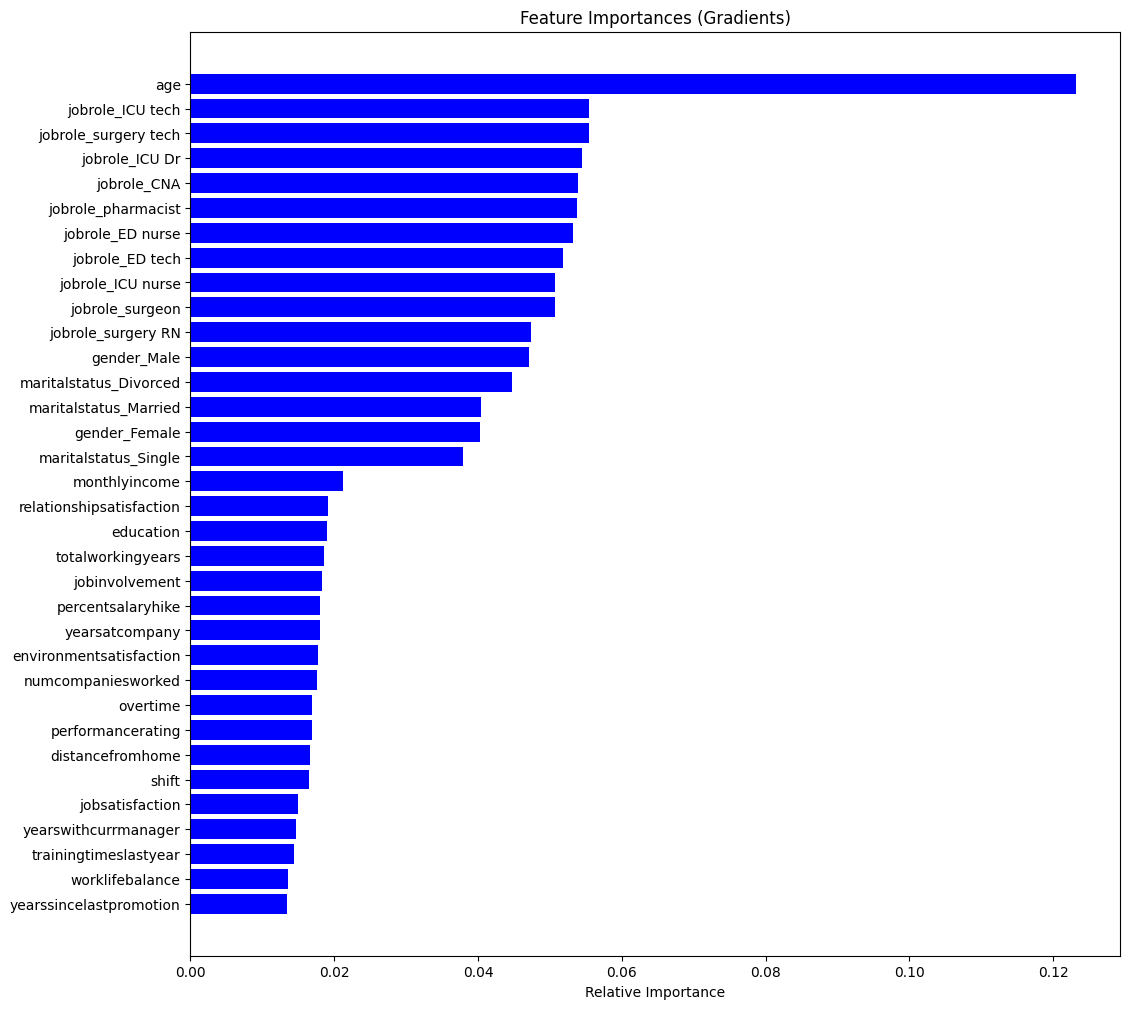

In [ ]:
# this code is 100# Chatgpt!
# I tried like crazy to figure out how to get feature importances out of a NN, but couldn't
# Chatgpt for the win on this one!

# Define a function to compute gradients using tf.GradientTape
def compute_gradients(model, inputs):
    with tf.GradientTape() as tape:
        tape.watch(inputs)
        outputs = model(inputs)
    gradients = tape.gradient(outputs, inputs)
    return gradients

# Ensure the input shape matches the model's expected input shape
if X_test_trans.shape[1] != model.input_shape[1]:
    raise ValueError(f"Mismatch in number of features. Model expects {model.input_shape[1]} features, but got {X_test_trans.shape[1]}")

# Convert to TensorFlow tensor if necessary
X_test_tensor = tf.convert_to_tensor(X_test_trans, dtype=tf.float32)

# Compute gradients for the test data
gradients = compute_gradients(model, X_test_tensor)

# Convert gradients to numpy array
gradients_np = gradients.numpy()

# Compute feature importances by taking the mean of absolute gradients
importances = np.mean(np.abs(gradients_np), axis=0)

# Get the feature names from the ColumnTransformer
def get_feature_names(column_transformer):
    output_features = []
    for name, transformer, features in column_transformer.transformers_:
        if hasattr(transformer, 'named_steps'):
            if 'onehot' in transformer.named_steps:
                onehot = transformer.named_steps['onehot']
                categories = onehot.categories_
                for feature, category in zip(features, categories):
                    output_features.extend([f"{feature}_{cat}" for cat in category])
            else:
                output_features.extend(features)
        else:
            output_features.extend(features)
    return output_features

feature_names = get_feature_names(preprocessor)

# Check that the number of feature names matches the number of columns in the transformed data
if len(feature_names) != X_train_trans.shape[1]:
    raise ValueError(f"Number of feature names ({len(feature_names)}) does not match the number of features in the transformed data ({X_train_trans.shape[1]})")

# Sort feature importances and plot
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances (Gradients)')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

A simple neural network model with 2 dropout layers,Sigmoid activation function and Adam optimizer improve the Recall Score to 82%.

Age and job role were the most effective predictors for this model.

## Model 2 with l2 kernal regularization

In [ ]:
# Let's try something different. We're going to use  l2
from tensorflow.keras.regularizers import l2

model_l2 = Sequential()

model_l2.add(Dense(69,
                   input_shape=(X_train_trans.shape[1],),
                   activation='relu',
                   kernel_regularizer=l2(0.01)
                   ))

model_l2.add(Dense(20, activation='relu',
          kernel_regularizer= l2(0.01)))

model_l2.add(Dense(1, activation='sigmoid',
          kernel_regularizer= l2(0.01)))

# Compile it
model_l2.compile(loss= 'binary_crossentropy',
                 optimizer='adam',
                 metrics= 'accuracy')

# Fit it

history_l2 = model_l2.fit(X_train_trans, y_train,
                          validation_data=(X_test_trans, y_test),
                          batch_size= 56,
                          epochs= 20)

Epoch 1/20
858/858 [==============================] - 4s 3ms/step - loss: 0.6105 - accuracy: 0.8233 - val_loss: 0.4843 - val_accuracy: 0.8208
Epoch 2/20
858/858 [==============================] - 3s 3ms/step - loss: 0.4751 - accuracy: 0.8241 - val_loss: 0.4777 - val_accuracy: 0.8208
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 0.4711 - accuracy: 0.8241 - val_loss: 0.4751 - val_accuracy: 0.8208
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 0.4699 - accuracy: 0.8241 - val_loss: 0.4738 - val_accuracy: 0.8208
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 0.4688 - accuracy: 0.8241 - val_loss: 0.4739 - val_accuracy: 0.8208
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 0.4684 - accuracy: 0.8241 - val_loss: 0.4744 - val_accuracy: 0.8208
Epoch 7/20
858/858 [==============================] - 3s 3ms/step - loss: 0.4680 - accuracy: 0.8241 - val_loss: 0.4721 - val_accuracy: 0.8208
Epoch 

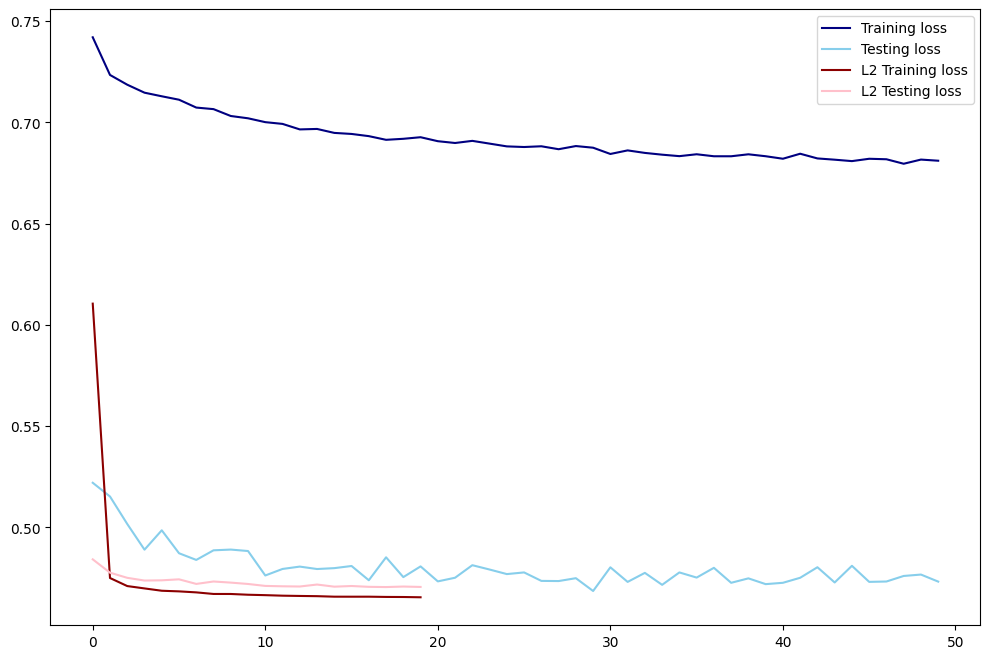

In [ ]:
# Visualize loss
train_loss_l2 = history_l2.history['loss']
test_loss_l2 = history_l2.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy') # training loss
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_l2, label='L2 Training loss', color='darkred') # l2 training loss
plt.plot(test_loss_l2, label='L2 Testing loss', color='pink')
plt.legend();

In [ ]:
# model 2 train performance
model2_train_perf = model_performance_classification(model_l2, X_train_trans, y_train)
model2_train_perf

1500/1500 [==============================] - 2s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.824104,0.824104,0.679148,0.744637


In [ ]:
# model 2 test performance
model2_test_perf = model_performance_classification(model_l2, X_test_trans, y_test)
model2_test_perf

375/375 [==============================] - 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.820833,0.820833,0.673767,0.740065


### Feature Importances- Model2

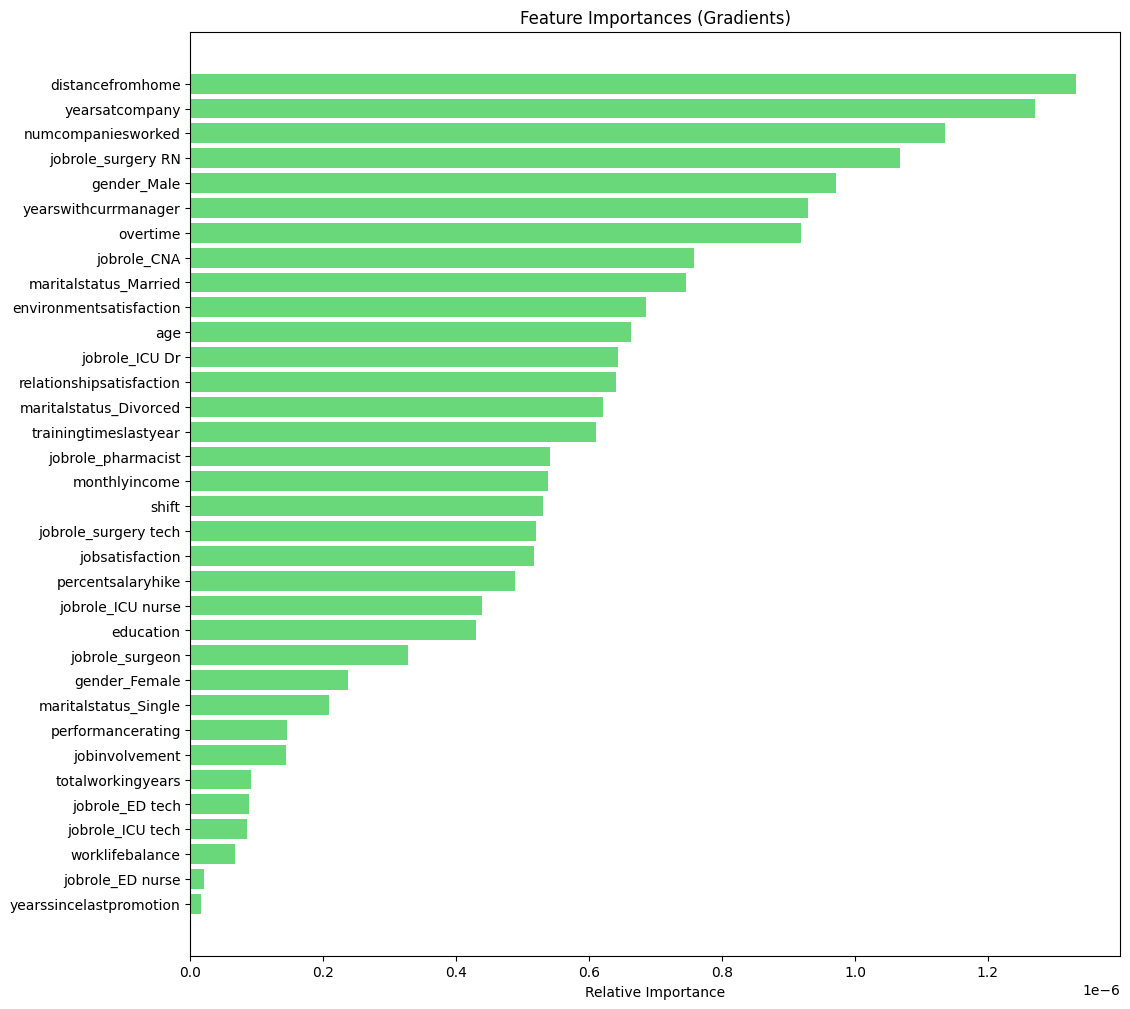

In [ ]:
# Define a function to compute gradients using tf.GradientTape
def compute_gradients(model, inputs):
    with tf.GradientTape() as tape:
        tape.watch(inputs)
        outputs = model(inputs)
    gradients = tape.gradient(outputs, inputs)
    return gradients

# Ensure the input shape matches the model's expected input shape
if X_test_trans.shape[1] != model.input_shape[1]:
    raise ValueError(f"Mismatch in number of features. Model expects {model.input_shape[1]} features, but got {X_test_trans.shape[1]}")

# Convert to TensorFlow tensor if necessary
X_test_tensor = tf.convert_to_tensor(X_test_trans, dtype=tf.float32)

# Compute gradients for the test data
gradients = compute_gradients(model_l2, X_test_tensor)

# Convert gradients to numpy array
gradients_np = gradients.numpy()

# Compute feature importances by taking the mean of absolute gradients
importances = np.mean(np.abs(gradients_np), axis=0)

# Get the feature names from the ColumnTransformer
def get_feature_names(column_transformer):
    output_features = []
    for name, transformer, features in column_transformer.transformers_:
        if hasattr(transformer, 'named_steps'):
            if 'onehot' in transformer.named_steps:
                onehot = transformer.named_steps['onehot']
                categories = onehot.categories_
                for feature, category in zip(features, categories):
                    output_features.extend([f"{feature}_{cat}" for cat in category])
            else:
                output_features.extend(features)
        else:
            output_features.extend(features)
    return output_features

feature_names = get_feature_names(preprocessor)

# Check that the number of feature names matches the number of columns in the transformed data
if len(feature_names) != X_train_trans.shape[1]:
    raise ValueError(f"Number of feature names ({len(feature_names)}) does not match the number of features in the transformed data ({X_train_trans.shape[1]})")

# Sort feature importances and plot
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances (Gradients)')
plt.barh(range(len(indices)), importances[indices], color='#68D87A', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

Using the l2 regularizer without any dropout, relu & sigmoid activation functions and Adam optimizer the model achieved 82% Recall.

The best features in this model were: Distance from home, years at company and number of companies worked.

## Model 3 SGD w/ Momentum

In [ ]:
#Initializing the neural network
# Define the neural network architecture
model3 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_trans.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# get model summary
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                2240      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
# Train the model
history = model.fit(X_train_trans, y_train, epochs=10, batch_size=32,
                    validation_split=0.2, class_weight={0: 1, 1: 2})
end=time.time()

Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.6785 - accuracy: 0.8099 - val_loss: 0.4722 - val_accuracy: 0.8294
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.6778 - accuracy: 0.8099 - val_loss: 0.4727 - val_accuracy: 0.8272
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.6758 - accuracy: 0.8109 - val_loss: 0.4705 - val_accuracy: 0.8282
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.6758 - accuracy: 0.8088 - val_loss: 0.4677 - val_accuracy: 0.8295
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.6786 - accuracy: 0.8111 - val_loss: 0.4762 - val_accuracy: 0.8291
Epoch 6/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.6758 - accuracy: 0.8098 - val_loss: 0.4690 - val_accuracy: 0.8288
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.6765 - accuracy: 0.8099 - val_loss: 0.4687 - val_accuracy:

In [ ]:
# model 3 train performance
model3_train_perf = model_performance_classification(model3, X_train_trans, y_train)
model3_train_perf

1500/1500 [==============================] - 2s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.703688,0.703688,0.706733,0.7052


In [ ]:
# model 3 test performance
model3_test_perf = model_performance_classification(model3, X_test_trans, y_test)
model3_test_perf

375/375 [==============================] - 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.70325,0.70325,0.703088,0.703169


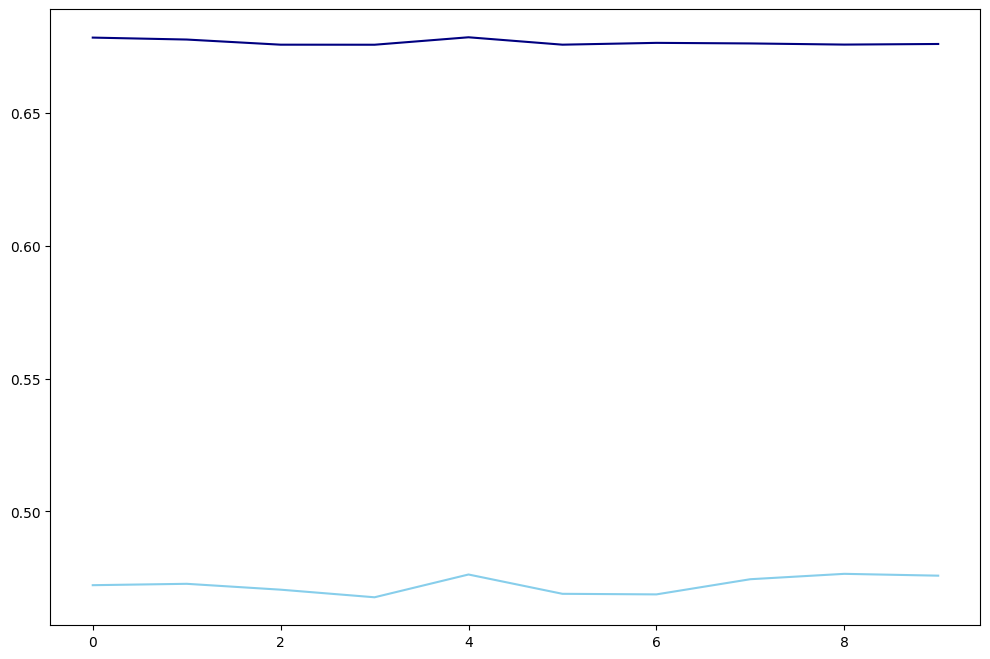

In [ ]:
# Visualize loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy') # training loss
plt.plot(test_loss, label='Testing loss', color='skyblue')

## Model 4 with Batch Normalization and Adam

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

In [ ]:
#Initializing the neural network
model4 = Sequential()
model4.add(Dense(64,activation="relu",input_dim=X_train_trans.shape[1]))
model4.add(Dense(32,activation="relu"))
model4.add(BatchNormalization())
model4.add(Dense(16,activation="relu"))
model4.add(BatchNormalization())
model4.add(Dense(1,activation="sigmoid"))

model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                2240      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_2 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_3 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation recall
    patience=10,           # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore best weights after stopping
)


# Train the model with early stopping
history = model4.fit(
    X_train_trans, y_train,
    epochs=50, batch_size=32,
    validation_split=0.2,
    class_weight={0: 1, 1: 2},
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/50
1200/1200 [==============================] - 7s 4ms/step - loss: 0.6176 - accuracy: 0.8046 - val_loss: 0.5172 - val_accuracy: 0.7638
Epoch 2/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.6150 - accuracy: 0.8039 - val_loss: 0.5108 - val_accuracy: 0.7681
Epoch 3/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.6148 - accuracy: 0.8047 - val_loss: 0.5099 - val_accuracy: 0.7710
Epoch 4/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.6107 - accuracy: 0.8064 - val_loss: 0.5044 - val_accuracy: 0.7761
Epoch 5/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.6109 - accuracy: 0.8044 - val_loss: 0.5241 - val_accuracy: 0.7541
Epoch 6/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.6094 - accuracy: 0.8047 - val_loss: 0.5171 - val_accuracy: 0.7638
Epoch 7/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.6089 - accuracy: 0.8067 - val_loss: 0.5138 - val_accuracy:

#### Model 4 Performance

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model4.evaluate(X_test_trans, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

375/375 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7732
Test Loss: 0.5246164202690125
Test Accuracy: 0.7732499837875366


In [ ]:
model4_train_perf = model_performance_classification(model4, X_train_trans, y_train)
model4_train_perf

1500/1500 [==============================] - 2s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.815646,0.815646,0.789741,0.798216


In [ ]:
model4_test_perf = model_performance_classification(model4, X_test_trans, y_test)
model4_test_perf

375/375 [==============================] - 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.767,0.767,0.72176,0.740488


## Model 5 Batch Normalization and Dropout with Adam and Focal Loss

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model5 = Sequential()
model5.add(Dense(14,activation="relu",input_dim=X_train_trans.shape[1]))
model5.add(BatchNormalization())
model5.add(Dropout(0.4))
model5.add(Dense(7,activation="relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2240      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        fl = - alpha_t * (1 - p_t) ** gamma * tf.math.log(p_t)
        return tf.reduce_mean(fl)
    return focal_loss_fixed

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model5.compile(optimizer=optimizer, loss= focal_loss(), metrics=['Recall'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_recall',  # Monitor validation recall
    patience=10,           # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore best weights after stopping
)


# Train the model with early stopping
history = model5.fit(
    X_train_trans, y_train,
    epochs=50, batch_size=32,
    validation_split=0.2,
    class_weight={0: 1, 1: 2},
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/50
1200/1200 [==============================] - 7s 4ms/step - loss: 0.0524 - recall: 0.0000e+00 - val_loss: 0.0423 - val_recall: 0.0000e+00
Epoch 2/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0523 - recall: 0.0000e+00 - val_loss: 0.0422 - val_recall: 0.0000e+00
Epoch 3/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0523 - recall: 0.0000e+00 - val_loss: 0.0422 - val_recall: 0.0000e+00
Epoch 4/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0523 - recall: 0.0000e+00 - val_loss: 0.0422 - val_recall: 0.0000e+00
Epoch 5/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0523 - recall: 0.0000e+00 - val_loss: 0.0423 - val_recall: 0.0000e+00
Epoch 6/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0522 - recall: 0.0000e+00 - val_loss: 0.0421 - val_recall: 0.0000e+00
Epoch 7/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0521 - recall: 0.0000e+00 - val_lo

### Model 5 Performance

In [ ]:
model5_train_perf = model_performance_classification(model5, X_train_trans, y_train)
model5_train_perf

1500/1500 [==============================] - 2s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.824104,0.824104,0.679148,0.744637


In [ ]:
model5_test_perf = model_performance_classification(model, X_test_trans, y_test)
model5_test_perf

375/375 [==============================] - 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.818917,0.818917,0.740799,0.744


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model1_train_perf.T,
        model2_train_perf.T,
        model3_train_perf.T,
        model4_train_perf.T,
        model5_train_perf.T,

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (Adam, With Dropout)",
    "Neural Network (Adem, L2 Regularization)",
    "Neural Network (SGD , With Momentum and Dropout)",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (Adam, Batch Normalization and Dropout)"
]

In [ ]:
# model test performance
models_test_comp_df = pd.concat(
    [
        model1_test_perf.T,
        model2_test_perf.T,
        model3_test_perf.T,
        model4_test_perf.T,
        model5_test_perf.T,

    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Neural Network (Adam, With Dropout)",
    "Neural Network (Adem, L2 Regularization)",
    "Neural Network (SGD , With Momentum and Dropout)",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (Adam, Batch Normalization and Dropout)"
]

In [ ]:
# training comparisons
models_train_comp_df

,"Neural Network (Adam, With Dropout)","Neural Network (Adem, L2 Regularization)","Neural Network (SGD , With Momentum and Dropout)","Neural Network (Adam, Batch Normalization)","Neural Network (Adam, Batch Normalization and Dropout)"
Accuracy,0.818917,0.820833,0.703250,0.767000,0.818917
Recall,0.818917,0.820833,0.703250,0.767000,0.818917
Precision,0.740799,0.673767,0.703088,0.721760,0.740799
F1 Score,0.744000,0.740065,0.703169,0.740488,0.744000


In [ ]:
# testing comparisons
models_test_comp_df

,"Neural Network (Adam, With Dropout)","Neural Network (Adem, L2 Regularization)","Neural Network (SGD , With Momentum and Dropout)","Neural Network (Adam, Batch Normalization)","Neural Network (Adam, Batch Normalization and Dropout)"
Accuracy,0.818917,0.820833,0.703250,0.767000,0.818917
Recall,0.818917,0.820833,0.703250,0.767000,0.818917
Precision,0.740799,0.673767,0.703088,0.721760,0.740799
F1 Score,0.744000,0.740065,0.703169,0.740488,0.744000


# Final Model Selection

All of the models had similar training and testing values, which indicates that we don't have a lot of overfitting. The best model taking into consideration overall scoring performance was the first Neural Network model with Relu and Sigmoid Activation functions, dropout and Adam optimizer.

Model Scores:
- Test Accuracy: 82%
- Test Recall: 82%
- Test Precision 74%
- Test F1 Score 74%